In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\combined_labels_and_tracks_imputed.csv")

In [4]:
df["Behavior"].value_counts()

Background     419849
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [5]:
# Sample function to calculate distance between two points
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Sample function to check proximity
def check_proximity(row, fish1_points, fish2_points, proximity_threshold):
    for fish1_point in fish1_points:
        for fish2_point in fish2_points:
            distance = calculate_distance(row[fish1_point], row[fish1_point+".1"], row[fish2_point], row[fish2_point+'.1'])
            if distance <= proximity_threshold:
                return 'Close' , distance
    return 'Farther', distance

In [29]:
cleaner_pointsX = ['Cleaner_Mouth', 'Cleaner_Spine1']
cleaner_pointsY = ['Cleaner_Mouth.1', 'Cleaner_Spine1.1']
client_pointsX = ['Client_Mouth', 'Client_Eye_L', 'Client_Eye_R', 
                 'Client_Spine_1', 'Client_Spine_2', 'Client_Tail']
client_pointsY = ['Client_Mouth.1', 'Client_Eye_L.1', 'Client_Eye_R.1', 
                 'Client_Spine_1.1', 'Client_Spine_2.1', 'Client_Tail.1']

# Calculate the centroids for cleaner and client points
df['Cleaner_Centroid_X'] = df[cleaner_pointsX].mean(axis=1)
df['Cleaner_Centroid_Y'] = df[cleaner_pointsY].mean(axis=1)
df['Client_Centroid_X'] = df[client_pointsX].mean(axis=1)
df['Client_Centroid_Y'] = df[client_pointsY].mean(axis=1)

# Calculate the Euclidean distance between centroids
df['Distance_Between_Centroids'] = np.sqrt((df['Client_Centroid_X'] - df['Cleaner_Centroid_X'])**2 + (df['Client_Centroid_Y'] - df['Cleaner_Centroid_Y'])**2)

In [8]:
# Define your fish points and proximity threshold
cleaner_points = ['Cleaner_Mouth', 'Cleaner_Spine1']  # Adjust as needed
client_points = ['Client_Mouth', 'Client_Eye_L', 'Client_Eye_R', 
                 'Client_Spine_1', 'Client_Spine_2', 'Client_Tail']  # Adjust as needed

proximity_threshold = 200  # Adjust as needed

# Apply the check_proximity function to each row
proximity_results = df.apply(lambda row: check_proximity(row, cleaner_points, client_points, proximity_threshold), axis=1)

# Extract proximity and distance values
proximity_values, distance_values = zip(*proximity_results)

# Add 'Proximity' and 'Distance' columns to the DataFrame
df['Proximity'] = proximity_values
df['Distance'] = distance_values

df

,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2,Proximity,Distance
0,Background,1315.999,419.526,0.508,1339.880,421.211,0.623,1332.051,410.567,0.996,...,916.767,0.999,1275.120,918.987,0.982,1296.810,914.343,0.860,Farther,522.967749
1,Background,1322.196,419.526,0.997,1324.325,421.211,0.929,1325.046,410.567,0.999,...,916.423,0.999,1275.003,918.987,0.999,1291.494,915.072,0.752,Farther,540.580968
2,Background,1308.093,419.526,0.956,1316.823,427.681,0.959,1323.911,410.782,0.946,...,914.062,0.994,1268.307,917.017,0.998,1282.976,924.739,0.197,Farther,544.528119
3,Background,1301.067,414.470,0.360,1309.184,427.705,0.550,1301.254,411.246,0.107,...,907.569,1.000,1258.767,917.017,0.998,1275.454,924.739,0.376,Farther,536.607986
4,Background,1269.530,414.470,0.975,1309.184,428.566,0.894,1283.725,411.246,0.994,...,907.569,1.000,1236.992,923.606,0.994,1275.454,930.310,0.158,Farther,532.958271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494460,Background,298.287,742.995,1.000,269.043,761.646,0.986,290.561,774.583,0.998,...,234.474,0.999,835.570,283.475,0.999,806.698,321.148,1.000,Farther,875.849823
494461,Background,295.017,738.109,1.000,269.043,761.591,0.986,291.875,772.057,0.998,...,225.127,1.000,843.247,268.478,0.999,817.811,311.338,1.000,Farther,886.051773
494462,Background,293.875,735.024,1.000,269.043,761.590,0.994,291.875,764.526,1.000,...,218.751,1.000,847.258,262.442,0.999,820.818,306.764,1.000,Farther,889.510977
494463,Background,289.687,733.892,1.000,269.043,755.672,0.995,291.875,764.125,0.999,...,211.232,0.999,852.580,251.502,0.999,832.998,300.703,0.999,Farther,894.907978


In [15]:
df["Proximity"].value_counts()

Farther    307517
Close      186948
Name: Proximity, dtype: int64

In [31]:
df

,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2,Proximity,Distance,Cleaner_Centroid_X,Cleaner_Centroid_Y,Client_Centroid_X,Client_Centroid_Y,Distance_Between_Centroids
0,Background,1315.999,419.526,0.508,1339.880,421.211,0.623,1332.051,410.567,0.996,...,1296.810,914.343,0.860,Farther,522.967749,1233.4695,911.3305,1362.679833,423.706500,504.452650
1,Background,1322.196,419.526,0.997,1324.325,421.211,0.929,1325.046,410.567,0.999,...,1291.494,915.072,0.752,Farther,540.580968,1223.6980,911.1585,1359.102833,419.230833,510.222793
2,Background,1308.093,419.526,0.956,1316.823,427.681,0.959,1323.911,410.782,0.946,...,1282.976,924.739,0.197,Farther,544.528119,1208.0175,909.3420,1355.204333,420.345000,510.668219
3,Background,1301.067,414.470,0.360,1309.184,427.705,0.550,1301.254,411.246,0.107,...,1275.454,924.739,0.376,Farther,536.607986,1198.8170,904.3840,1342.842667,418.297333,506.974990
4,Background,1269.530,414.470,0.975,1309.184,428.566,0.894,1283.725,411.246,0.994,...,1275.454,930.310,0.158,Farther,532.958271,1189.3590,904.3840,1319.903833,418.440833,503.172649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494460,Background,298.287,742.995,1.000,269.043,761.646,0.986,290.561,774.583,0.998,...,806.698,321.148,1.000,Farther,875.849823,844.5400,210.2680,257.018667,788.251000,824.163616
494461,Background,295.017,738.109,1.000,269.043,761.591,0.986,291.875,772.057,0.998,...,817.811,311.338,1.000,Farther,886.051773,847.1335,200.0060,256.781333,787.032167,832.535525
494462,Background,293.875,735.024,1.000,269.043,761.590,0.994,291.875,764.526,1.000,...,820.818,306.764,1.000,Farther,889.510977,847.2910,194.8065,257.208167,785.244500,834.754324
494463,Background,289.687,733.892,1.000,269.043,755.672,0.995,291.875,764.125,0.999,...,832.998,300.703,0.999,Farther,894.907978,847.2910,189.4995,256.497167,783.842667,838.022168


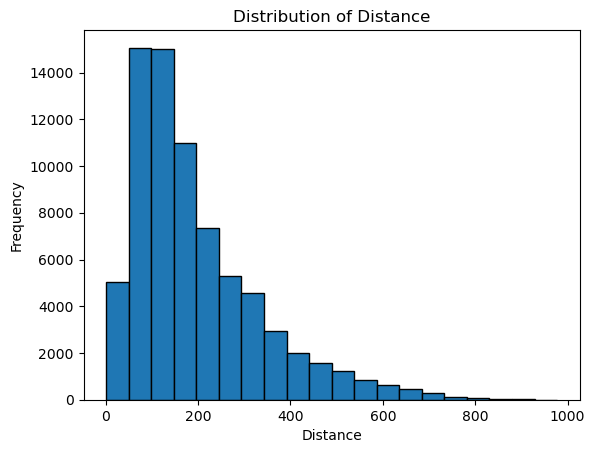

In [36]:
# Create a histogram of the 'Distance' column
plt.hist(df[df['Behavior'] == 'interaction']['Distance_Between_Centroids'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

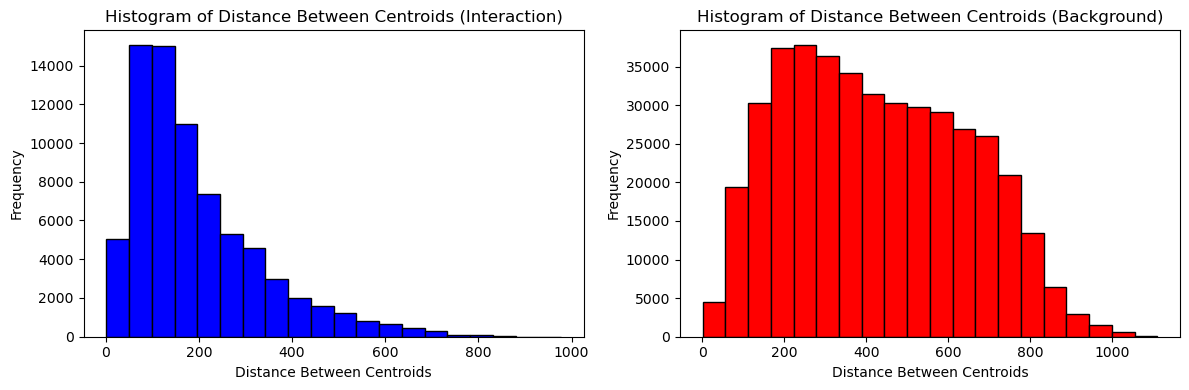

In [39]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first histogram (interaction)
ax1.hist(df[df['Behavior'] == 'interaction']['Distance_Between_Centroids'], bins=20, edgecolor='black', color='blue')
ax1.set_xlabel('Distance Between Centroids')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Distance Between Centroids (Interaction)')

# Plot the second histogram (non-interaction)
ax2.hist(df[df['Behavior'] == 'Background']['Distance_Between_Centroids'], bins=20, edgecolor='black', color='red')
ax2.set_xlabel('Distance Between Centroids')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Distance Between Centroids (Background)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

## Angle of incidence

In [59]:
# Define the coordinates for the cleaner fish segment
cleaner_mouth_x = df['Cleaner_Mouth']
cleaner_mouth_y = df['Cleaner_Mouth.1']
cleaner_tail_x = df['Cleaner_Spine1']
cleaner_tail_y = df['Cleaner_Spine1.1']

# Define the coordinates for the client fish segment
client_mouth_x = df['Client_Mouth']
client_mouth_y = df['Client_Mouth.1']
client_tail_x = df['Client_Tail']
client_tail_y = df['Client_Tail.1']

cleaner_direction_x = cleaner_tail_x - cleaner_mouth_x
cleaner_direction_y = cleaner_tail_y - cleaner_mouth_y

client_direction_x = client_tail_x - client_mouth_x
client_direction_y = client_tail_y - client_mouth_y

# Calculate the dot product and magnitudes
dot_product = (cleaner_direction_x * client_direction_x +
               cleaner_direction_y * client_direction_y)

magnitude_cleaner = np.sqrt(cleaner_direction_x**2 + cleaner_direction_y**2)
magnitude_client = np.sqrt(client_direction_x**2 + client_direction_y**2)

# Calculate the cosine of the angle of incidence
cosine_angle = dot_product / (magnitude_cleaner * magnitude_client)

# Calculate the angle of incidence in degrees
angle_degrees = np.degrees(np.arccos(cosine_angle))

# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Add relevant data to the new DataFrame
new_df["Behavior"] = df['Behavior']
new_df['Cleaner_Mouth_X'] = cleaner_mouth_x
new_df['Cleaner_Mouth_Y'] = cleaner_mouth_y
new_df['Cleaner_Tail_X'] = cleaner_tail_x
new_df['Cleaner_Tail_Y'] = cleaner_tail_y
new_df['Client_Mouth_X'] = client_mouth_x
new_df['Client_Mouth_Y'] = client_mouth_y
new_df['Client_Tail_X'] = client_tail_x
new_df['Client_Tail_Y'] = client_tail_y
new_df['Angle_of_Incidence'] = angle_degrees

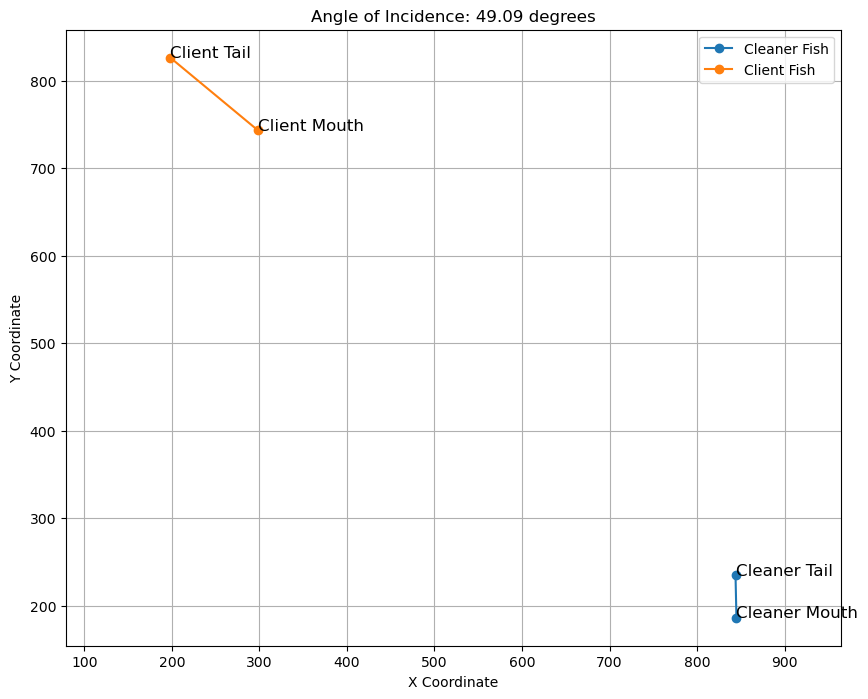

In [58]:
# Select one row (e.g., the first row) to plot
row_to_plot = new_df.iloc[494460]

# Extract the data for Cleaner Mouth and Tail coordinates
cleaner_mouth_x = row_to_plot['Cleaner_Mouth_X']
cleaner_mouth_y = row_to_plot['Cleaner_Mouth_Y']
cleaner_tail_x = row_to_plot['Cleaner_Tail_X']
cleaner_tail_y = row_to_plot['Cleaner_Tail_Y']

# Extract the data for Client Mouth and Tail coordinates
client_mouth_x = row_to_plot['Client_Mouth_X']
client_mouth_y = row_to_plot['Client_Mouth_Y']
client_tail_x = row_to_plot['Client_Tail_X']
client_tail_y = row_to_plot['Client_Tail_Y']

# Extract the angle of incidence
angle_degrees = row_to_plot['Angle_of_Incidence']

# Create a plot
plt.figure(figsize=(10, 8))

# Plot Cleaner Mouth and Tail coordinates
plt.plot([cleaner_mouth_x, cleaner_tail_x], [cleaner_mouth_y, cleaner_tail_y], marker='o', label='Cleaner Fish')
plt.text(cleaner_mouth_x, cleaner_mouth_y, 'Cleaner Mouth', fontsize=12)
plt.text(cleaner_tail_x, cleaner_tail_y, 'Cleaner Tail', fontsize=12)

# Plot Client Mouth and Tail coordinates
plt.plot([client_mouth_x, client_tail_x], [client_mouth_y, client_tail_y], marker='o', label='Client Fish')
plt.text(client_mouth_x, client_mouth_y, 'Client Mouth', fontsize=12)
plt.text(client_tail_x, client_tail_y, 'Client Tail', fontsize=12)

# Add labels and legend
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Angle of Incidence: {angle_degrees:.2f} degrees')
plt.legend()

# Show the plot
plt.grid()
plt.axis('equal')  # Equal aspect ratio
plt.show()